In [1]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Plot Loss functions, Dynamic weights and Learning Rate
# ***Above*** 1.00 $R_j$
##################################################################
# %%
#  # ! Setup
import numpy as np;
from matplotlib.ticker import LogLocator;
import matplotlib.pyplot as plt;
plt.rcParams.update({'font.size': 12});
from LW_PINN_VP3_JUNO import *;
from LW_CoordinateTransformation import *;

In [2]:
# %%

#  # ! Obs & Col & NN Hyper-Parameters 
# TODO ******************** Parameters ******************** #
pj1=1; pj2=50;            # orbit 1-50 | orbit 1-24 | orbit 25-50
cutRType=2;               # 1: 2.5Rj; 2: 4.0Rj; 3: 7.0Rj
nLayer=6; nNeuron=40;
actiFun='swish';          # 'tanh' 'gelu' 'siren' 'swish' 'relu' 'sigmoid'
opti='Adam';              # 'Adam'
DW=1;                     # Dynamic Weights 1/0 for On/Off
k=1; c=0; n0=3000; dn=600;   # 2023WuCX
nEpo=12000;
BS=10000; 
rdSeed=12345;
# TODO ********************** end ************************* #
fNameHead = BuildFileNameHead(pj1,pj2,cutRType,nLayer,nNeuron,\
     actiFun,opti,DW,k,c,n0,dn,nEpo,BS,rdSeed);

In [3]:
# %%

#  # ! Read from file Loss Terms, Dynamic Weights and Learning Rate
fileLossVars='output/'+fNameHead+'_LossVars.txt';
dataLossVars=np.loadtxt(fileLossVars);
EPOCHs=dataLossVars[:,0:1]; 
loss=dataLossVars[:,1:2]; 
true_loss=dataLossVars[:,2:3];
bx_obs_loss=dataLossVars[:,3:4]; 
by_obs_loss=dataLossVars[:,4:5];
bz_obs_loss=dataLossVars[:,5:6]; 
curlBx_col_loss=dataLossVars[:,6:7];
curlBy_col_loss=dataLossVars[:,7:8];
curlBz_col_loss=dataLossVars[:,8:9];
w_obs=dataLossVars[:,9:10];
lr=dataLossVars[:,10:11];
print('Finish read data from file: %s'%(fileLossVars),flush=True);

Finish read data from file: output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_LossVars.txt


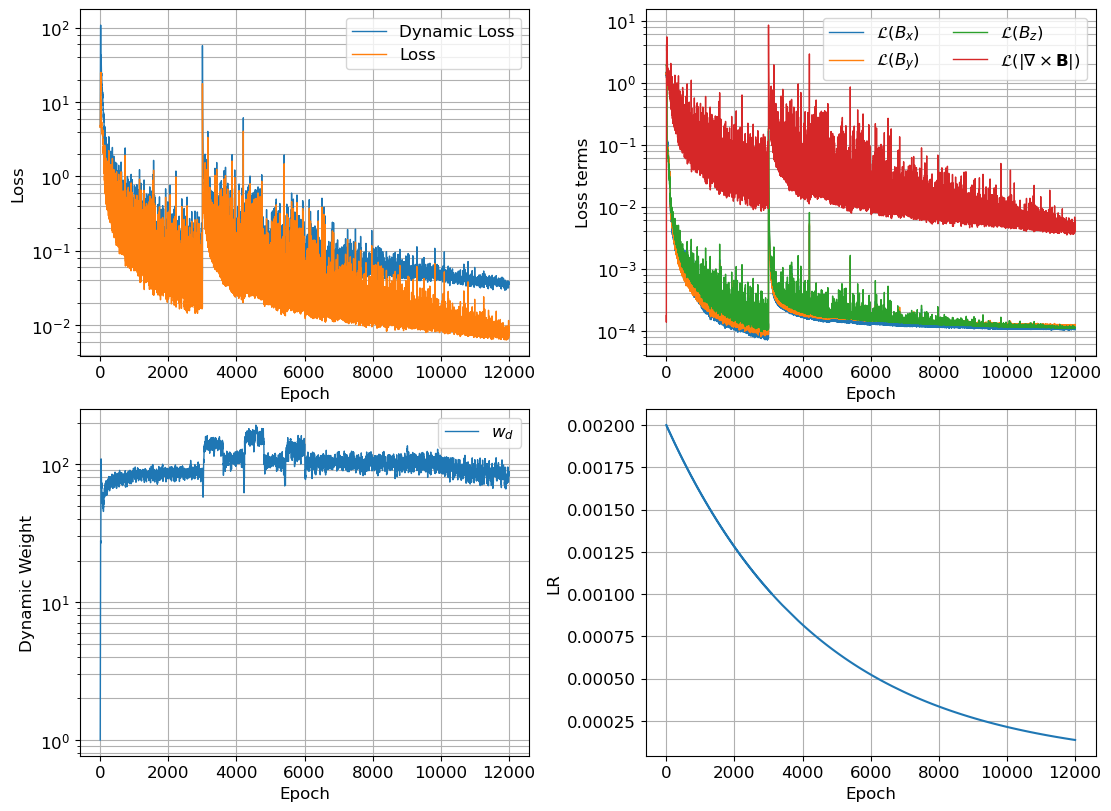

In [4]:
# %%

#  # ! Plot Loss Functions, Dynamic Weights and Learning Rate
# TODO ******************** Parameters ******************** #
pltStep=1;
# TODO ********************** end ************************* #
y_minor = LogLocator(base = 10, subs =[2,4,6,8]);
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 8), layout='constrained');
######## Loss
axs[0,0].semilogy(EPOCHs[::pltStep], loss[::pltStep], label='Dynamic Loss', linewidth=1);
axs[0,0].semilogy(EPOCHs[::pltStep], true_loss[::pltStep], label='Loss', linewidth=1);
axs[0,0].set_xlabel('Epoch'); axs[0,0].set_ylabel('Loss');
axs[0,0].yaxis.set_minor_locator(y_minor);
axs[0,0].grid(which='both'); axs[0,0].legend();
######## Loss Terms
curlB_col_loss = np.sqrt(curlBx_col_loss**2+curlBx_col_loss**2+curlBx_col_loss**2);
axs[0,1].semilogy(EPOCHs[::pltStep], bx_obs_loss[::pltStep],\
    label=r'$\mathcal{L}(B_{x})$', linewidth=1);
axs[0,1].semilogy(EPOCHs[::pltStep], by_obs_loss[::pltStep],\
    label=r'$\mathcal{L}(B_{y})$', linewidth=1);
axs[0,1].semilogy(EPOCHs[::pltStep], bz_obs_loss[::pltStep],\
    label=r'$\mathcal{L}(B_{z})$', linewidth=1);
axs[0,1].semilogy(EPOCHs[::pltStep], curlB_col_loss[::pltStep],\
    label=r'$\mathcal{L}(|\nabla \times \mathbf{B}|)$', linewidth=1);
axs[0,1].set_xlabel('Epoch'); axs[0,1].set_ylabel('Loss terms');
axs[0,1].yaxis.set_minor_locator(y_minor);
axs[0,1].grid(which='both'); axs[0,1].legend(ncols=2);
######## Dynamic Weights
axs[1,0].semilogy(EPOCHs[::pltStep], w_obs[::pltStep], label='$w_{d}$', linewidth=1);
axs[1,0].set_xlabel('Epoch'); axs[1,0].set_ylabel('Dynamic Weight');
axs[1,0].grid(which='both'); axs[1,0].legend();
######## Learning Rate
axs[1,1].plot(EPOCHs[::pltStep], lr[::pltStep]);
axs[1,1].set_xlabel('Epoch'); axs[1,1].set_ylabel('LR');
axs[1,1].grid(which='both');

plt.savefig('Fig3.png',dpi=300);
plt.show();